<a id="1"></a>
<h1 style="color:red;font-size:45px;font-family:Georgia;text-align:center;"><strong><strong style="color:black;font-size:40px;font-family:Georgia;">Importing <strong style="color:red;font-size:45px;font-family:Georgia;">The <strong style="color:black;font-size:40px;font-family:Georgia;">Libraries </strong></strong></strong></strong></h1>

In [0]:
# !pip install dash

In [0]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import dash
import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import plotly.io as pio
pio.templates.default = "plotly_dark"
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing 
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<a id="2"></a>
<h1 style="color:red;font-size:45px;font-family:Georgia;text-align:center;"><strong><strong style="color:black;font-size:40px;font-family:Georgia;">Loading <strong style="color:red;font-size:45px;font-family:Georgia;">The <strong style="color:black;font-size:40px;font-family:Georgia;">DataSet </strong></strong></strong></strong></h1>

In [0]:
df = pd.read_csv('/dbfs/mnt/AFcovid19/AFAnalytics/PersAvailCsv/ProcessedPersAvailF22.csv')
# dff= df.add_prefix('df.')
# dff.columns

<a id="3"></a>
<h1 style="color:red;font-size:45px;font-family:Georgia;text-align:center;"><strong><strong style="color:black;font-size:40px;font-family:Georgia;">Exploratory <strong style="color:red;font-size:45px;font-family:Georgia;">Data <strong style="color:black;font-size:40px;font-family:Georgia;">Analysis </strong></strong></strong></strong></h1>

In [0]:
df.shape

Out[7]: (124354, 38)

In [0]:
df.PersonID.nunique()

Out[8]: 378

In [0]:
df.dtypes

Out[9]: Unnamed: 0 int64
PersonID int64
PersAvail_AvailableIndicatorID int64
PersAvail_DeployabilityIndicatorID int64
DeployabilityStatusCode object
DeployabilityStatusCategory object
OVERALLIMR object
IsPersonMedicalStatusPassed float64
IsDeferred float64
PHA_PASS float64
DENTAL_PAS float64
IMM_PASS float64
EQP_PASS float64
LAB_PASS float64
DLC_PASS float64
MedReadyStatus_MedicalReadyStatusName object
OrganizationUic object
HomeLocationName object
HomeLatitude float64
HomeLongitude float64
HomeRegionName object
Mil_PayGradeName object
Rank_RankName object
PersComponent_ComponentName object
OrgComponent_ComponentName object
ReserveCat_ReserveCategoryName object
OccSp_OccupationalSpecialtyName object
Osdh_OccupationalSpecialtyDesignatorName object
Ut_UnitTypeName object
Ul_UnitLevelName object
Ud_UnitDescriptorName object
Stp_SecurityTypeName object
Mc_MajorCommandName object
Cc_CombatantCommandName object
PersAvail_WHStartDate object
year int64
month int64
PersAvailSinceYYMM object
dtype: object

In [0]:
df=df.drop(columns=['Unnamed: 0'])

In [0]:
df.isnull().sum()

Out[11]: PersonID 0
PersAvail_AvailableIndicatorID 0
PersAvail_DeployabilityIndicatorID 0
DeployabilityStatusCode 0
DeployabilityStatusCategory 0
OVERALLIMR 0
IsPersonMedicalStatusPassed 2759
IsDeferred 2759
PHA_PASS 90993
DENTAL_PAS 89691
IMM_PASS 91175
EQP_PASS 90770
LAB_PASS 90541
DLC_PASS 90669
MedReadyStatus_MedicalReadyStatusName 0
OrganizationUic 0
HomeLocationName 21094
HomeLatitude 21094
HomeLongitude 21094
HomeRegionName 21094
Mil_PayGradeName 0
Rank_RankName 0
PersComponent_ComponentName 0
OrgComponent_ComponentName 0
ReserveCat_ReserveCategoryName 0
OccSp_OccupationalSpecialtyName 0
Osdh_OccupationalSpecialtyDesignatorName 0
Ut_UnitTypeName 7305
Ul_UnitLevelName 0
Ud_UnitDescriptorName 0
Stp_SecurityTypeName 0
Mc_MajorCommandName 0
Cc_CombatantCommandName 14813
PersAvail_WHStartDate 0
year 0
month 0
PersAvailSinceYYMM 0
dtype: int64

In [0]:
df['IsPersonMedicalStatusPassed'] = df['IsPersonMedicalStatusPassed'].fillna(-1)
df['IsDeferred'] = df['IsDeferred'].fillna(-1)
df['PHA_PASS'] = df['PHA_PASS'].fillna(-1)
df['IMM_PASS'] = df['IMM_PASS'].fillna(-1)
df['EQP_PASS'] = df['EQP_PASS'].fillna(-1)
df['LAB_PASS'] = df['LAB_PASS'].fillna(-1)
df['DLC_PASS'] = df['DLC_PASS'].fillna(-1)


In [0]:
df['HomeLocationName'] = df['HomeLocationName'].fillna('Not Provided')
df['HomeLatitude'] = df['HomeLatitude'].fillna('Not Provided')
df['HomeLongitude'] = df['HomeLongitude'].fillna('Not Provided')
df['HomeRegionName'] = df['HomeRegionName'].fillna('Not Provided')
df['Ut_UnitTypeName'] = df['Ut_UnitTypeName'].fillna('Not Provided')
df['Cc_CombatantCommandName'] = df['Cc_CombatantCommandName'].fillna('Not Provided')


In [0]:
df=df.drop(['DENTAL_PAS'], axis=1)

In [0]:
df.isnull().sum()

Out[15]: PersonID 0
PersAvail_AvailableIndicatorID 0
PersAvail_DeployabilityIndicatorID 0
DeployabilityStatusCode 0
DeployabilityStatusCategory 0
OVERALLIMR 0
IsPersonMedicalStatusPassed 0
IsDeferred 0
PHA_PASS 0
IMM_PASS 0
EQP_PASS 0
LAB_PASS 0
DLC_PASS 0
MedReadyStatus_MedicalReadyStatusName 0
OrganizationUic 0
HomeLocationName 0
HomeLatitude 0
HomeLongitude 0
HomeRegionName 0
Mil_PayGradeName 0
Rank_RankName 0
PersComponent_ComponentName 0
OrgComponent_ComponentName 0
ReserveCat_ReserveCategoryName 0
OccSp_OccupationalSpecialtyName 0
Osdh_OccupationalSpecialtyDesignatorName 0
Ut_UnitTypeName 0
Ul_UnitLevelName 0
Ud_UnitDescriptorName 0
Stp_SecurityTypeName 0
Mc_MajorCommandName 0
Cc_CombatantCommandName 0
PersAvail_WHStartDate 0
year 0
month 0
PersAvailSinceYYMM 0
dtype: int64

In [0]:
df.duplicated().sum()

Out[16]: 0

<a id="4"></a>
<h1 style="color:red;font-size:45px;font-family:Georgia;text-align:center;"><strong><strong style="color:black;font-size:40px;font-family:Georgia;"> <strong style="color:red;font-size:45px;font-family:Georgia;">Data <strong style="color:black;font-size:40px;font-family:Georgia;">Visualization </strong></strong></strong></strong></h1>

In [0]:
df.rename({'PersAvail_AvailableIndicatorID': 'PersAvailability', 'PersAvail_DeployabilityIndicatorID': 'Deployability','IsPersonMedicalStatusPassed': 'MedicalStatusFlag','MedReadyStatus_MedicalReadyStatusName': 'MedicalStatusName','OrganizationUic': 'Uic', 'Mil_PayGradeName': 'PayGrade','Rank_RankName': 'Rank','PersComponent_ComponentName': 'PersComponent','OrgComponent_ComponentName': 'OrgComponent', 'ReserveCat_ReserveCategoryName': 'ReserveCategory','OccSp_OccupationalSpecialtyName': 'OccupationalSpecialty','Osdh_OccupationalSpecialtyDesignatorName': 'OccupationalSpecialtyDesignator','Ul_UnitLevelName': 'UnitLevel', 'Ud_UnitDescriptorName': 'UnitDescriptor','Stp_SecurityTypeName': 'SecurityType','Mc_MajorCommandName': 'MajorCommand','Cc_CombatantCommandName': 'CombatantCommand','Mc_MajorCommandName': 'MajorCommand'}, axis=1, inplace=True)

In [0]:
df['year'].value_counts().values.tolist()


Out[26]: [50461, 38509, 30147, 1608, 1365, 1211, 1053]

In [0]:
df.dtypes

Out[28]: PersonID int64
PersAvailability int64
Deployability int64
DeployabilityStatusCode object
DeployabilityStatusCategory object
OVERALLIMR object
MedicalStatusFlag float64
IsDeferred float64
PHA_PASS float64
IMM_PASS float64
EQP_PASS float64
LAB_PASS float64
DLC_PASS float64
MedicalStatusName object
Uic object
HomeLocationName object
HomeLatitude object
HomeLongitude object
HomeRegionName object
PayGrade object
Rank object
PersComponent object
OrgComponent object
ReserveCategory object
OccupationalSpecialty object
OccupationalSpecialtyDesignator object
Ut_UnitTypeName object
UnitLevel object
UnitDescriptor object
SecurityType object
MajorCommand object
CombatantCommand object
PersAvail_WHStartDate object
year int64
month int64
PersAvailSinceYYMM object
dtype: object

In [0]:
df = df.iloc[: , :-1]
df.head(20)

Out[38]:

,PersonID,PersAvailability,Deployability,DeployabilityStatusCode,DeployabilityStatusCategory,OVERALLIMR,MedicalStatusFlag,IsDeferred,PHA_PASS,IMM_PASS,EQP_PASS,LAB_PASS,DLC_PASS,MedicalStatusName,Uic,HomeLocationName,HomeLatitude,HomeLongitude,HomeRegionName,PayGrade,Rank,PersComponent,OrgComponent,ReserveCategory,OccupationalSpecialty,OccupationalSpecialtyDesignator,Ut_UnitTypeName,UnitLevel,UnitDescriptor,SecurityType,MajorCommand,CombatantCommand,PersAvail_WHStartDate,year,month
0,1253338,1,1,Deployable,Deployable,FMR,1.0,0.0,-1.0,-1.0,-1.0,1.0,1.0,Fully Medically Ready,FFMQY0,RICHMOND INTL,37.505,-77.32,VIRGINIA,Enlisted Personnel,Senior Airman,Guard Component,Guard Component,NotProvided,AEROSPACE GRD EQPMT,Duty,Not Provided by ADS,Squadron,ACTIVE COMBAT,Unclassified,0000 NATIONAL GUARD BUR SA,US AIR FORCE,2017-01-20,2017,1
1,1253338,1,1,Deployable,Deployable,FMR,1.0,0.0,1.0,1.0,-1.0,-1.0,-1.0,Fully Medically Ready,FFMQY0,RICHMOND INTL,37.505,-77.32,VIRGINIA,Enlisted Personnel,Senior Airman,Guard Component,Guard Component,NotProvided,AEROSPACE GRD EQPMT,Duty,Not Provided by ADS,Squadron,ACTIVE COMBAT,Unclassified,0000 NATIONAL GUARD BUR SA,US AIR FORCE,2017-01-20,2017,1
2,1258677,1,0,PendingSeparation,Admin,MRI,1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,Medical Readiness Indeterminate,FFHDG0,JB ELMENDORF-RICH,61.251,-149.806,ALASKA,Enlisted Personnel,Senior Airman,Active Component,Active Component,Not Applicable,SECURITY FORCES JOURNEYMAN,Primary,TFS F 15 TAC FTR SQ,Squadron,ACTIVE COMBAT,Unclassified,US Air Forces in the Pacific (PACAF),US AIR FORCE,2018-11-02,2018,11
3,1258677,1,0,PendingSeparation,Admin,MRI,1.0,0.0,-1.0,1.0,-1.0,1.0,1.0,Medical Readiness Indeterminate,FFHDG0,JB ELMENDORF-RICH,61.251,-149.806,ALASKA,Enlisted Personnel,Senior Airman,Active Component,Active Component,Not Applicable,SECURITY FORCES,Primary,Not Provided by ADS,Squadron,ACTIVE OTHER,Unclassified,HEADQUARTERS PACIF NS,US AIR FORCE,2018-11-02,2018,11
4,1258677,1,0,PendingSeparation,Admin,MRI,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,Medical Readiness Indeterminate,FFHDG0,JB ELMENDORF-RICH,61.251,-149.806,ALASKA,Enlisted Personnel,Senior Airman,Active Component,Active Component,Not Applicable,SECURITY FORCES JOURNEYMAN,Primary,TFS F 15 TAC FTR SQ,Squadron,ACTIVE COMBAT,Unclassified,US Air Forces in the Pacific (PACAF),US AIR FORCE,2018-11-02,2018,11
5,184774754,0,1,Deployable,Deployable,FMR,1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,Fully Medically Ready,FFYXX0,JB LANGLEY-EUSTIS,37.083,-76.361,VIRGINIA,Commissioned Officer,Lieutenant Colonel,Active Component,Active Component,Not Applicable,"SAFETY, FIGHTER PILOT, F-22",Duty,TFS F 15 TAC FTR SQ,Squadron,ACTIVE COMBAT,Unclassified,Air Combat Command (ACC),US AIR FORCE,2013-05-08,2013,5
6,184774754,0,1,Deployable,Deployable,FMR,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,Fully Medically Ready,FFYXX0,JB LANGLEY-EUSTIS,37.083,-76.361,VIRGINIA,Commissioned Officer,Lieutenant Colonel,Active Component,Active Component,Not Applicable,"SAFETY, FIGHTER PILOT, F-22",Duty,TFS F 15 TAC FTR SQ,Squadron,ACTIVE COMBAT,Unclassified,Air Combat Command (ACC),US AIR FORCE,2013-05-08,2013,5
7,184774754,0,1,Deployable,Deployable,FMR,1.0,0.0,1.0,-1.0,-1.0,-1.0,-1.0,Fully Medically Ready,FFYXX0,JB LANGLEY-EUSTIS,37.083,-76.361,VIRGINIA,Commissioned Officer,Lieutenant Colonel,Active Component,Active Component,Not Applicable,"SAFETY, FIGHTER PILOT, F-22",Duty,TFS F 15 TAC FTR SQ,Squadron,ACTIVE COMBAT,Unclassified,Air Combat Command (ACC),US AIR FORCE,2013-05-08,2013,5
8,184779508,0,0,ControlRoster,Admin,FMR,1.0,0.0,-1.0,-1.0,1.0,-1.0,-1.0,Fully Medically Ready,FFYXX0,JB LANGLEY-EUSTIS,37.083,-76.361,VIRGINIA,Enlisted Personnel,Technical Sergeant,Active Component,Active Component,Not Applicable,AEROSP MED SVC,Duty,TFS F 15 TAC FTR SQ,Squadron,ACTIVE COMBAT,Unclassified,HQ ACC CMD,US AIR FORCE,2013-05-08,2013,5
9,184779508,0,0,ControlRoster,Admin,FMR,1.0,0.0,-1.0,1.0,-1.0,1.0,1.0,Fully Medically Ready,FFYXX0,LANGLEY AFB,37.08,-76.36,VIRGINIA,Enlisted Personnel,Tec

In [0]:
df.columns

Out[39]: Index(['PersonID', 'PersAvailability', 'Deployability',
 'DeployabilityStatusCode', 'DeployabilityStatusCategory', 'OVERALLIMR',
 'MedicalStatusFlag', 'IsDeferred', 'PHA_PASS', 'IMM_PASS', 'EQP_PASS',
 'LAB_PASS', 'DLC_PASS', 'MedicalStatusName', 'Uic', 'HomeLocationName',
 'HomeLatitude', 'HomeLongitude', 'HomeRegionName', 'PayGrade', 'Rank',
 'PersComponent', 'OrgComponent', 'ReserveCategory',
 'OccupationalSpecialty', 'OccupationalSpecialtyDesignator',
 'Ut_UnitTypeName', 'UnitLevel', 'UnitDescriptor', 'SecurityType',
 'MajorCommand', 'CombatantCommand', 'PersAvail_WHStartDate', 'year',
 'month'],
 dtype='object')

In [0]:
df1=df[['PersAvailability', 
        'Deployability',
       'DeployabilityStatusCode', 
       'DeployabilityStatusCategory',
       'OVERALLIMR',
       'MedicalStatusFlag',
       'MedicalStatusName',
        'Uic', 
        'HomeRegionName', 
        'PayGrade', 
        'Rank',
        'PersComponent', 
        'OrgComponent', 
        'ReserveCategory',
       'OccupationalSpecialty', 
        'OccupationalSpecialtyDesignator',
        'UnitDescriptor', 
        'MajorCommand', 
        'CombatantCommand']]

In [0]:
df1.columns

Out[41]: Index(['PersAvailability', 'Deployability', 'DeployabilityStatusCode',
 'DeployabilityStatusCategory', 'OVERALLIMR', 'MedicalStatusFlag',
 'MedicalStatusName', 'Uic', 'HomeRegionName', 'PayGrade', 'Rank',
 'PersComponent', 'OrgComponent', 'ReserveCategory',
 'OccupationalSpecialty', 'OccupationalSpecialtyDesignator',
 'UnitDescriptor', 'MajorCommand', 'CombatantCommand'],
 dtype='object')

In [0]:
df1.dtypes

Out[42]: PersAvailability int64
Deployability int64
DeployabilityStatusCode object
DeployabilityStatusCategory object
OVERALLIMR object
MedicalStatusFlag float64
MedicalStatusName object
Uic object
HomeRegionName object
PayGrade object
Rank object
PersComponent object
OrgComponent object
ReserveCategory object
OccupationalSpecialty object
OccupationalSpecialtyDesignator object
UnitDescriptor object
MajorCommand object
CombatantCommand object
dtype: object

In [0]:
df1=pd.get_dummies(df1,columns=['DeployabilityStatusCode',
       'DeployabilityStatusCategory', 'OVERALLIMR', 'MedicalStatusFlag',
       'MedicalStatusName', 'Uic', 'HomeRegionName', 'PayGrade', 'Rank',
       'PersComponent','OrgComponent' ,'ReserveCategory',
       'OccupationalSpecialty', 'OccupationalSpecialtyDesignator',
       'UnitDescriptor', 'MajorCommand', 'CombatantCommand'],drop_first=True)


In [0]:
df1=df1.fillna(0)

In [0]:
df1.columns

Out[47]: Index(['PersAvailability', 'Deployability', 'OrgComponent',
 'DeployabilityStatusCode_ControlRoster',
 'DeployabilityStatusCode_DEROS',
 'DeployabilityStatusCode_DeferredHostileZone',
 'DeployabilityStatusCode_Deployable',
 'DeployabilityStatusCode_FunctionalCatLPipeline',
 'DeployabilityStatusCode_InsufficientClearance',
 'DeployabilityStatusCode_InsufficientClearanceSSIRReq',
 ...
 'MajorCommand_HEADQUARTERS PACIF NS', 'MajorCommand_HQ ACC CMD',
 'MajorCommand_HQ PACAF', 'MajorCommand_U S AIR FORCE HQ WQ',
 'MajorCommand_US Air Forces in the Pacific (PACAF)',
 'CombatantCommand_Not Provided', 'CombatantCommand_US AIR FORCE',
 'CombatantCommand_USEUCOM', 'CombatantCommand_USUCCEUR',
 'CombatantCommand_USUCCPAC'],
 dtype='object', length=610)

In [0]:
target = df1['PersAvailability'].copy()

In [0]:
# let's remove the target feature and redundant features from the dataset
df1.drop(['PersAvailability'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df1.shape))

Size of Full dataset is: (124354, 609)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df1,target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset: (93265, 609)
Number transactions y_train dataset: (93265,)
Number transactions X_test dataset: (31089, 609)
Number transactions y_test dataset: (31089,)

In [0]:
X_Train=x_train.copy()
X_Test= x_test.copy()
X_Train= y_train.copy()
Y_Test= y_test.copy()

In [0]:

#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#Libraries to visualize the dataset
import matplotlib as mpl
import plotly.graph_objs as go
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

#Libraries to AutoEDA
# import pandas_profiling as pp

#Useful machine learning libraries....
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
# from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

Out[70]: Out[70]: CrossVal_Score_Means CrossValerrors Algo
0 0.887203 0.003269 RandomForestClassifier
1 0.908347 0.002225 AdaBoostClassifier
2 0.960628 0.001883 Gradient Boosting
3 0.960542 0.001757 ExtraTreesClassifier
4 0.960478 0.001741 DecisionTreeClassifier

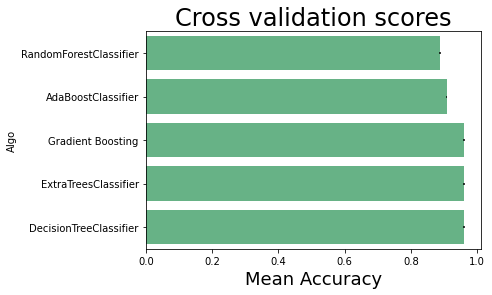

<Figure size 864x576 with 0 Axes>

In [0]:
# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, x_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier','DecisionTreeClassifier']})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#5abf84')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

In [0]:
x_train.head(20)


Out[54]:

,Deployability,OrgComponent,DeployabilityStatusCode_ControlRoster,DeployabilityStatusCode_DEROS,DeployabilityStatusCode_DeferredHostileZone,DeployabilityStatusCode_Deployable,DeployabilityStatusCode_FunctionalCatLPipeline,DeployabilityStatusCode_InsufficientClearance,DeployabilityStatusCode_InsufficientClearanceSSIRReq,DeployabilityStatusCode_InsufficientTOS,DeployabilityStatusCode_MedicalDeferment,DeployabilityStatusCode_NotProvided,DeployabilityStatusCode_Other,DeployabilityStatusCode_OtherAdministrative,DeployabilityStatusCode_OtherMedical,DeployabilityStatusCode_PCSPending,DeployabilityStatusCode_PendingSeparation,DeployabilityStatusCode_Pregnancy,DeployabilityStatusCategory_Deployable,DeployabilityStatusCategory_Medical,DeployabilityStatusCategory_Training,DeployabilityStatusCategory_Undefined,OVERALLIMR_MRI,OVERALLIMR_NMR,OVERALLIMR_PMR,OVERALLIMR_Z2,MedicalStatusFlag_0.0,MedicalStatusFlag_1.0,MedicalStatusName_Medical Readiness Indeterminate,MedicalStatusName_Not Medically Ready,MedicalStatusName_Not Provided from ADS,MedicalStatusName_Partially Medically Ready,Uic_FFHKR1,Uic_FFL4X0,Uic_FFMQY0,Uic_FFYXV0,Uic_FFYXX0,HomeRegionName_HAWAII,HomeRegionName_Not Provided,HomeRegionName_UNKNOWN,HomeRegionName_VIRGINIA,PayGrade_Enlisted Personnel,PayGrade_Not Applicable,Rank_2nd Lieutenant,Rank_Airman Basic-�,Rank_Airman First Class,Rank_Captain,Rank_Colonel,Rank_First Sergeant (Chief Master Sergeant),Rank_First Sergeant (Master Sergeant)-�,Rank_First Sergeant (Senior Master Sergeant)-�,Rank_Lieutenant Colonel,Rank_Major,Rank_Not Applicable,Rank_Senior Airman,Rank_Staff Sergeant,Rank_Technical Sergeant,PersComponent_Guard Component,PersComponent_Not Applicable,PersComponent_Selected Reserve,ReserveCategory_Not Applicable,ReserveCategory_NotProvided,ReserveCategory_Retired Reserve,ReserveCategory_Selected Reserve - Trained Individuals (non-unit),ReserveCategory_Selected Reserve - Trained in Units,ReserveCategory_Selected Reserve - Training Pipeline,ReserveCategory_Standby (Active and Inactive),"OccupationalSpecialty_AC-130H/U/J/W, GUNSHIP",OccupationalSpecialty_ACFT ARMAMENT SYS,OccupationalSpecialty_ACFT ELE & ENVIR SYS,OccupationalSpecialty_ACFT HYDRAULIC SYS,OccupationalSpecialty_ACFT MTL TECHNOLOGY,OccupationalSpecialty_ACFT STRC MAINT,OccupationalSpecialty_ACQUISITION MANAGER,OccupationalSpecialty_ADMINISTRATION APPRENTICE,OccupationalSpecialty_ADMINISTRATION CRAFTSMAN,OccupationalSpecialty_ADMINISTRATION JOURNEYMAN,OccupationalSpecialty_ADV LOG OFF CRSE GRAD,OccupationalSpecialty_ADVANCED AVIATION RESOURCE MANAGER,OccupationalSpecialty_AERIAL BULK FUEL DELIVERY SYSTEMS,OccupationalSpecialty_AERIAL BULK FUEL DELIVERY SYSTEMS OPERATOR,OccupationalSpecialty_AEROSP MED SVC,"OccupationalSpecialty_AEROSP PRPLSN APPR, F101/F110/F118/TF34 JET ENG (A10/B1/B2/F16/U2 ACFT)","OccupationalSpecialty_AEROSP PRPLSN APPR, JET ENG (ARLFT, SP MSN & B52 ACFT)","OccupationalSpecialty_AEROSP PRPLSN APR TF33, CF6, F103, F108, F117, TFE-731, TF34, TF39, PW","OccupationalSpecialty_AEROSP PRPLSN CRFTMN, JET ENG (A10/B1/B2/F15/F16/F22/F35/U2 ACFT)","OccupationalSpecialty_AEROSP PRPLSN CRFTMN, JET ENG (ARLFT, SP MSN, & B52 ACFT)","OccupationalSpecialty_AEROSP PRPLSN CRFTMN, TURBOPROP/TURBOSHAFT PROP (HELICOPTER/PRPLLR/TILTRTR ACFT)","OccupationalSpecialty_AEROSP PRPLSN JRNYMN, JET ENG (A10/B1/B2/F15/F16/F22/F35/U2 ACFT)","OccupationalSpecialty_AEROSP PRPLSN JRNYMN, JET ENG (ARLFT, SP MSN & B52 ACFT)",OccupationalSpecialty_AEROSPACE GRD EQPMT,OccupationalSpecialty_AEROSPACE GROUND EQPMT APPRENTICE,OccupationalSpecialty_AEROSPACE GROUND EQPMT CRAFTSMAN,OccupationalSpecialty_AEROSPACE GROUND EQPMT JOURNEYMAN,"OccupationalSpecialty_AEROSPACE MED SERVICE CRAFTSMAN, FLIGHT AND OPERATIONAL MED TECH","OccupationalSpecialty_AEROSPACE MED SERVICE CRAFTSMAN, FLIGHT AND OPERATIONAL MEDICAL TECH",OccupationalSpecialty_AEROSPACE MEDICAL SERVICE APPRENTICE,OccupationalSpecialty_AEROSPACE MEDICAL SERVICE CRAFTSMAN,"OccupationalSpecialty_AEROSPACE MEDICAL SERVICE CRAF

In [0]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Out[71]: [[ 7627 635]
 [ 617 22210]]
 precision recall f1-score support

 0 0.93 0.92 0.92 8262
 1 0.97 0.97 0.97 22827

 accuracy 0.96 31089
 macro avg 0.95 0.95 0.95 31089
weighted avg 0.96 0.96 0.96 31089

DecisionTreeClassifier()

In [0]:
# ada = AdaBoostClassifier(base_estimator = dtc)

# parameters = {
#     'n_estimators' : [50, 70, 90, 120, 180, 200],
#     'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
#     'algorithm' : ['SAMME', 'SAMME.R']
# }

# grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
# grid_search.fit(x_train, y_train)

In [0]:
# print(grid_search.best_params_)
# print(grid_search.best_score_)

In [0]:
# ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 1, n_estimators = 70)
# ada.fit(x_train, y_train)

In [0]:
# plot_confusion_matrix(ada,
#                       x_test, y_test,
#                       cmap=plt.cm.summer,
#                       display_labels = ['Available_1','Not Available_0'])
# plt.grid(False)
# plt.show();

In [0]:
# print(classification_report(y_test, y_pred))

In [0]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [175,200,225],
              'min_samples_split':[10,15,20],
              'min_samples_leaf': [1],
              'max_depth': [25,30]}

grid_obj = GridSearchCV(rf_classifier,
#                         iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(x_train.loc[:, x_train.columns != 'PersonID'], y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

====================
best params: RandomForestClassifier(class_weight='balanced', max_depth=30,
 min_samples_split=10, n_estimators=225, random_state=7)
best params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 225}
best score: 0.9945360016944889
====================

In [0]:
   # importances = dtc.feature_importances_
# indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
# indices = indices[:20]
# names = [x_train.loc[:, x_train.columns != 'PersonID'].columns[i] for i in indices]
# features=names[:20]
# names = features # Rearrange feature names so they match the sorted feature importances
# plt.figure(figsize=(28, 20)) # Create plot
# plt.title("Feature Importance",fontsize=20) # Create plot title
# plt.barh(range(len(features)),importances[indices],align="center") # Add bars
# plt.gca().invert_yaxis()
# # plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
# plt.yticks(range(len(features)), features,fontsize=20) # Add feature names as x-axis labels
# plt.xticks(fontsize=20) # Add feature names as x-axis labels
# plt.grid(False)
# plt.show() # Show plot
# bb




Out[73]: Out[73]: Out[73]: Out[73]: Out[73]:

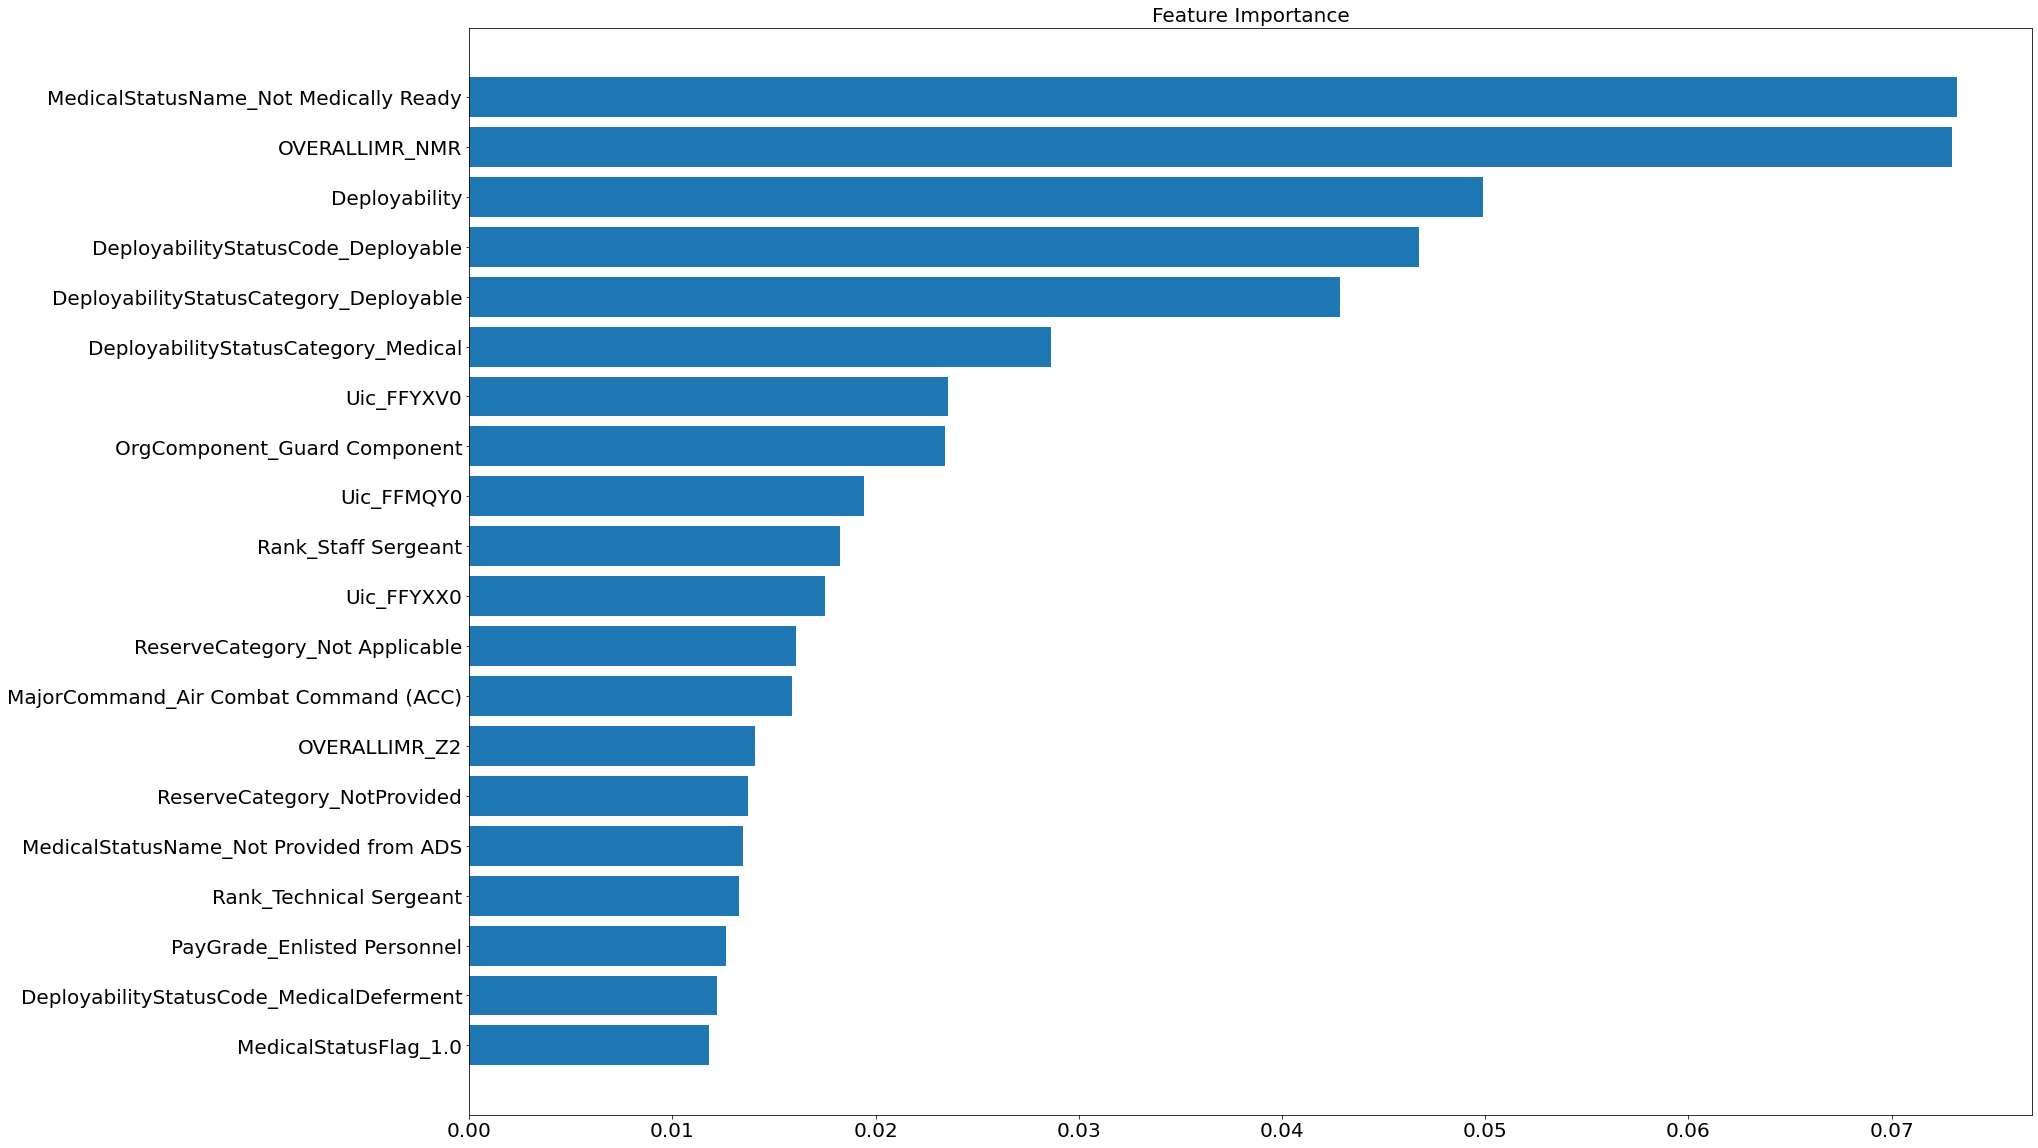

(array([0. , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]),
 [Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')])

In [0]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
indices = indices[:20]
names = [x_train.loc[:, x_train.columns != 'PersonID'].columns[i] for i in indices]
features=names[:20]
names = features # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(28, 20)) # Create plot
plt.title("Feature Importance",fontsize=20) # Create plot title
plt.barh(range(len(features)),importances[indices],align="center") # Add bars
plt.gca().invert_yaxis()
# plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.yticks(range(len(features)), features,fontsize=20) # Add feature names as x-axis labels
plt.xticks(fontsize=20) # Add feature names as x-axis labels
plt.grid(False)
plt.show() # Show plot